# Линейная алгебра и приложения в многомерной статистике

*Алла Тамбовцева, НИУ ВШЭ*

## Метод главных компонент: практикум с библиотекой `pca`

### Реализуем МГК для создания интегрального индекса

Установим библиотеку `pca` (надстройка над `PCA()` из `sklearn`, просто с доработанными функциями для визуализации):

In [ ]:
# !pip install pca

Импортируем необходимые библиотеки и модули:

* стандартный набор: `pandas` для работы с таблицами;
* функция, а точнее, класс `pca()` из `pca` для реализации МГК.

In [2]:
import pandas as pd
from pca import pca

Загрузим данные о качестве жизни в крупных городах:

In [3]:
# dropna() – удаляем пропуски
# здесь их нет, но важно в этом убедиться
# алгоритм не запустится, если они есть

df = pd.read_csv("city24.csv")
df = df.dropna()
df.head()

,Unnamed: 0,City,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,0,New York,70,High,35,40,6.5,100,80
1,1,Los Angeles,65,Medium,40,50,6.8,90,75
2,2,Chicago,60,Medium,30,55,7.0,85,70
3,3,London,55,High,50,60,7.2,110,85
4,4,Paris,60,High,45,65,6.9,95,80


Пояснения по столбцам:
    
* `city`: название города;
* `Decibel_Level`: уровень шума;
* `Traffic_Density`: плотность трафика, интенсивность дорожного движения;
* `Green_Space_Area`: площадь зеленых насаждений;
* `Air_Quality_Index`: индекс качества воздуха (чем выше, тем грязнее воздух);
* `Happiness_Score`: индекс счастья;
* `Cost_of_Living_Index`: индекс стоимости жизни;
* `Healthcare_Index`: индекс качества здравоохранения.

Выберем числовые столбцы и уберём лишнее:

In [4]:
# выбираем столбцы типов float, int
# удаляем среди них Unnamed: 0 (номер строки) и Happiness_Score

data = df.select_dtypes([float, int])
data = data.drop(columns = ["Unnamed: 0", "Happiness_Score"])

Создадим объект класса `pca` из библиотеки `pca`:

In [5]:
# сразу включаем стандартизацию
# StandardScaler() запустится сам

pc = pca(normalize = True)

Запускаем алгоритм МГК:

In [6]:
# col_labels - названия исходных столбцов из data
# чтобы было понятно в результатах, что где

res = pc.fit_transform(data, col_labels = data.columns)

[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


Почему в перечне выполняемых действий выше фигурируют только три главных компоненты, хотя в `data` было пять столбцов? Алгоритм по умолчанию работает так: реализует метод главных компонент на всех столбцах, а затем отбирает в результаты столько главных компонент, сколько в сумме объясняют не менее 95% дисперсии исходных данных:

    Number of components is [3] that covers the [95.00%] explained variance.
    
Если мы посмотрим, что находится внутри `res`, мы обнаружим там большой словарь со следующими ключами и значениями:

* `loadings`: нагрузки, веса исходных показателей в главных компонентах;
* `PC`: значения главных компонент для каждого наблюдения (датафрейм);
* `explained_var`: совокупная доля дисперсии, объясненной первыми $k$ главными компонентами;
* `variance_ratio`: доля дисперсии, объясненной каждой компонентой;
* `model`: описание параметров алгоритма;
* `topfeat`:  показатели с самыми большими весами по модуля (и в какие компоненты они входят);
* `outliers`: характеристики, позволяющие понять, являются ли наблюдения выбросами (датафрейм);
* `outliers_params`: наблюдения, считающиеся выбросами, и их характеристики.

In [7]:
res

{'loadings':      Decibel_Level  Green_Space_Area  Air_Quality_Index  Cost_of_Living_Index  \
 PC1       0.508794         -0.451788           0.510028              0.078070   
 PC2      -0.160941         -0.437689          -0.199954              0.847862   
 PC3       0.707536          0.481111           0.071893              0.328160   
 
      Healthcare_Index  
 PC1         -0.520377  
 PC2          0.153864  
 PC3          0.393786  , 'PC':           PC1       PC2       PC3
 0    0.459452  1.401640  0.476790
 1    0.399841  1.102356 -0.024836
 2    0.397080  1.035879 -0.569285
 3   -0.291234  1.794820 -0.171478
 4    0.121525  1.281747 -0.139401
 ..        ...       ...       ...
 110 -2.414269 -1.440934  0.468115
 111 -2.012181 -1.750961  0.720978
 112 -2.331505 -1.544082  0.494340
 113 -2.675800 -1.608387  0.162742
 114 -2.526562 -1.549722  0.587695
 
 [115 rows x 3 columns], 'explained_var': array([0.67720368, 0.94252312, 0.97005937, 0.9893682 , 1.        ]), 'variance_ratio': a

Выведем проценты объяснённой дисперсии:

In [8]:
print(res["variance_ratio"])
print(res["explained_var"])

[0.67720368 0.26531944 0.02753625 0.01930883 0.0106318 ]
[0.67720368 0.94252312 0.97005937 0.9893682  1.        ]


Итак, первая главная компонента объясняет 67.7% дисперсии, вторая – 26.5% дисперсии, третья – примерно 3%.
Две первых главных компоненты в сумме объясняют 94% дисперсии, три первых – 97% дисперсии (собственно, поэтому алгоритм выше и предложил выбрать три – вместе объясняют более 95% дисперсии). 

Визуализируем их:

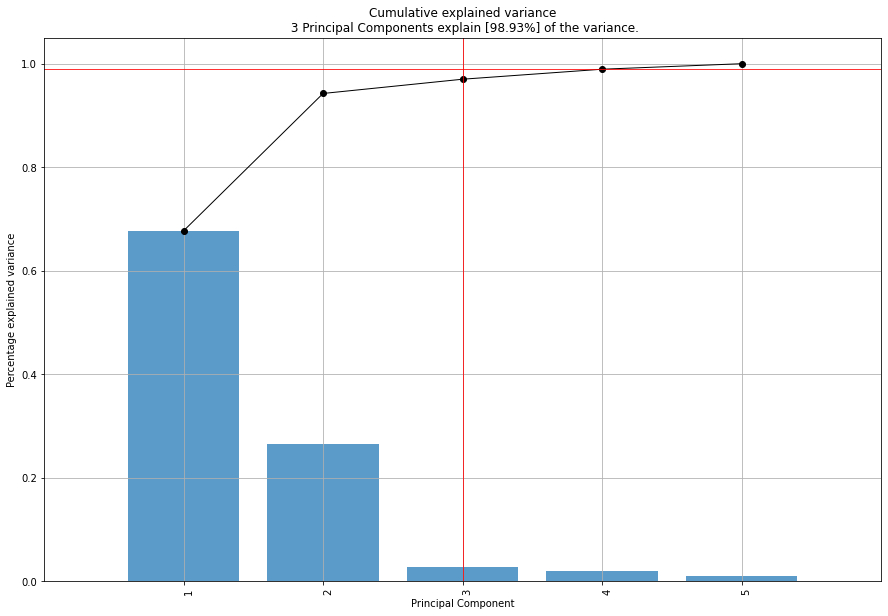

In [9]:
pc.plot();

График выше – доработанный график каменистой осыпи (правда, вместо осыпи здесь теперь «насыпь»). По горизонтальной оси по-прежнему число главных компонент, по вертикальной – их их информативность, доля объясненной дисперсии. Только линией теперь соединены не точки, соответствующие информативности каждой главной компоненты, а точки, соответствующие их **совокупной информативности**. Но логика та же, можем выбрать столько главных компонент, сколько до «излома» графика, то есть две. 

В этом практикуме мы сконцентрируемся на задаче построения интегрального индекса качества жизни в городе, поэтому будем работать только с **первой главной компонентой** как с наиболее информативной.

Выведем нагрузки – веса:

In [9]:
# .T – транспонируем для более привычного вида

res["loadings"].T

,PC1,PC2,PC3
Decibel_Level,0.508794,-0.160941,0.707536
Green_Space_Area,-0.451788,-0.437689,0.481111
Air_Quality_Index,0.510028,-0.199954,0.071893
Cost_of_Living_Index,0.078070,0.847862,0.328160
Healthcare_Index,-0.520377,0.153864,0.393786


Итак, первая главная компонента положительно связана с индексом качества воздуха, уровнем шума и стоимостью жизни и отрицательно – с площадью зеленых насаждений и уровнем здравоохранения. Значит, самые высокие значения этой компоненты будут получать шумные города с катастрофически грязным воздухом, без зелени и с плохим уровнея здравоохранения :) 

Получается, мы получаем «обратный» индекс качества жизни в городе. Это нестрашно – без потерь для задачи мы можем в дальнейшем взять значения этой главной компоненты с минусом, и тогда все встанет на свои места – большие по модулю отрицательные значения будут у городов с плохими показателями качества жизни в городе, а большие положительные значения – у «образцовых» городов.

**NB.** В более новой версии `scipy` веса будут иными, с другими знаками. Тогда все еще проще, получается, первая главная компонента содержательно будет означать индекс качества жизни в городе, где большие значения соответствуют лучшему качеству. Тогда добавлять «минус» к значениям компоненты не понадобится.

А пока построим график *biplot*, который позволяет посмотреть на соотношение исходных показателей и главных компонент:

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


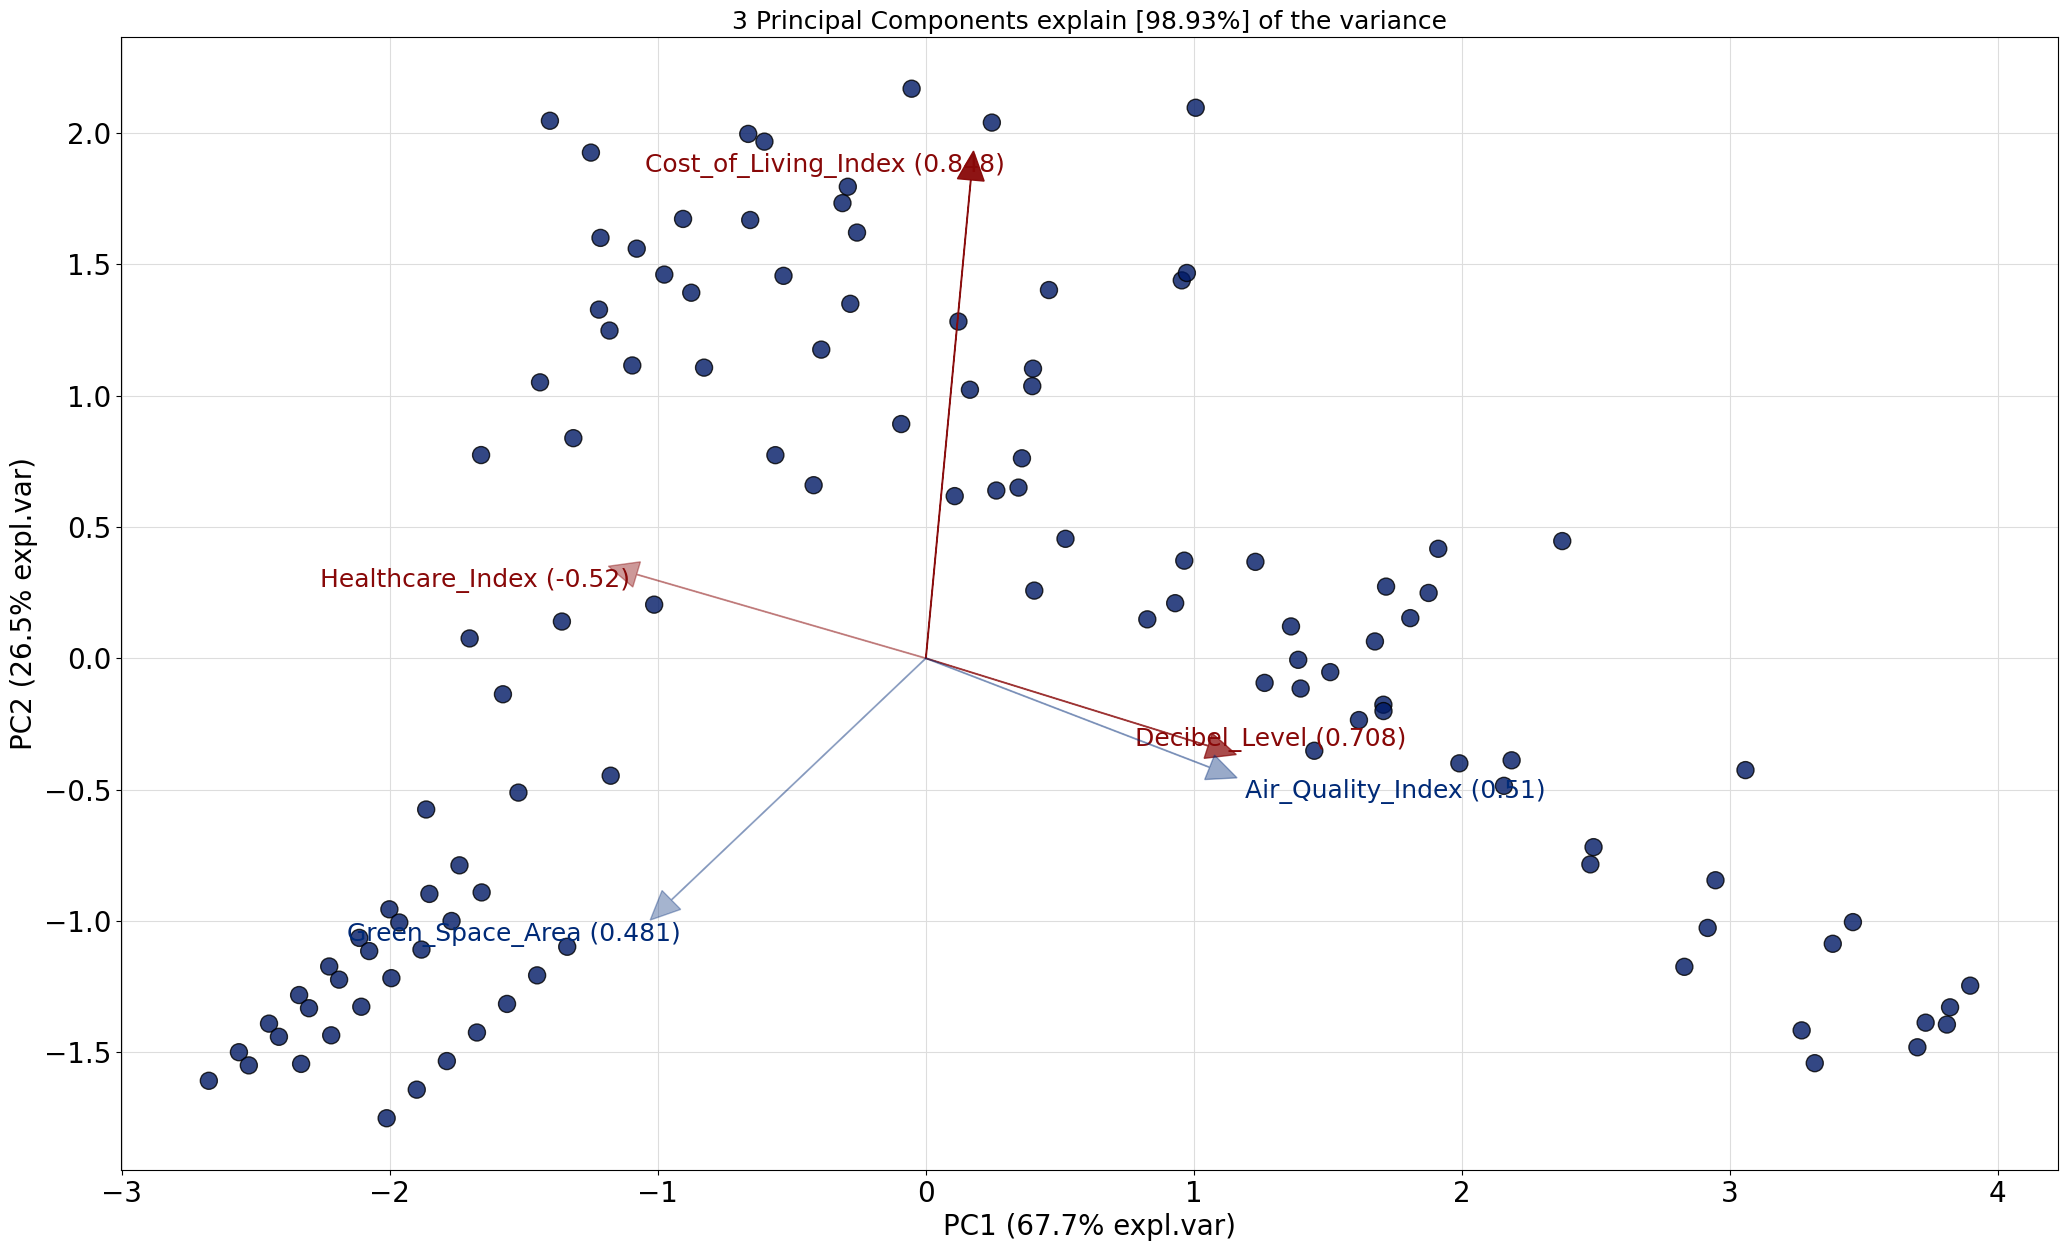

In [10]:
pc.biplot();

Этот график отображает то, что мы только что увидели в перечне нагрузок. Какие-то исходные показатели (вектора) сонаправлены с первой главной компонентой по горизонтальной оси (положительно связаны с ней, это все те же `Decibel_Level`, `Air_Quality_Index`, `Cost_of_Living_Index`), какие-то – направлены в противоположную сторону (отрицательно связаны с ней, это все те же `Green_Space_Area` и `Healthcare_Index`). 

При этом график позволяет приблизительно понять, какие координаты у точек были до МГК, а какие получились после МГК. Выберите любую точку на диаграмме и попробуйте ее спроецировать на старые оси (на все пять, хотя тут сложновато), а затем – на новые (на `PC1` и `PC2`). 

Однако этот график обычно используют без точек, достаточно векторов. Чтобы точки не мешали, выключим их:

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


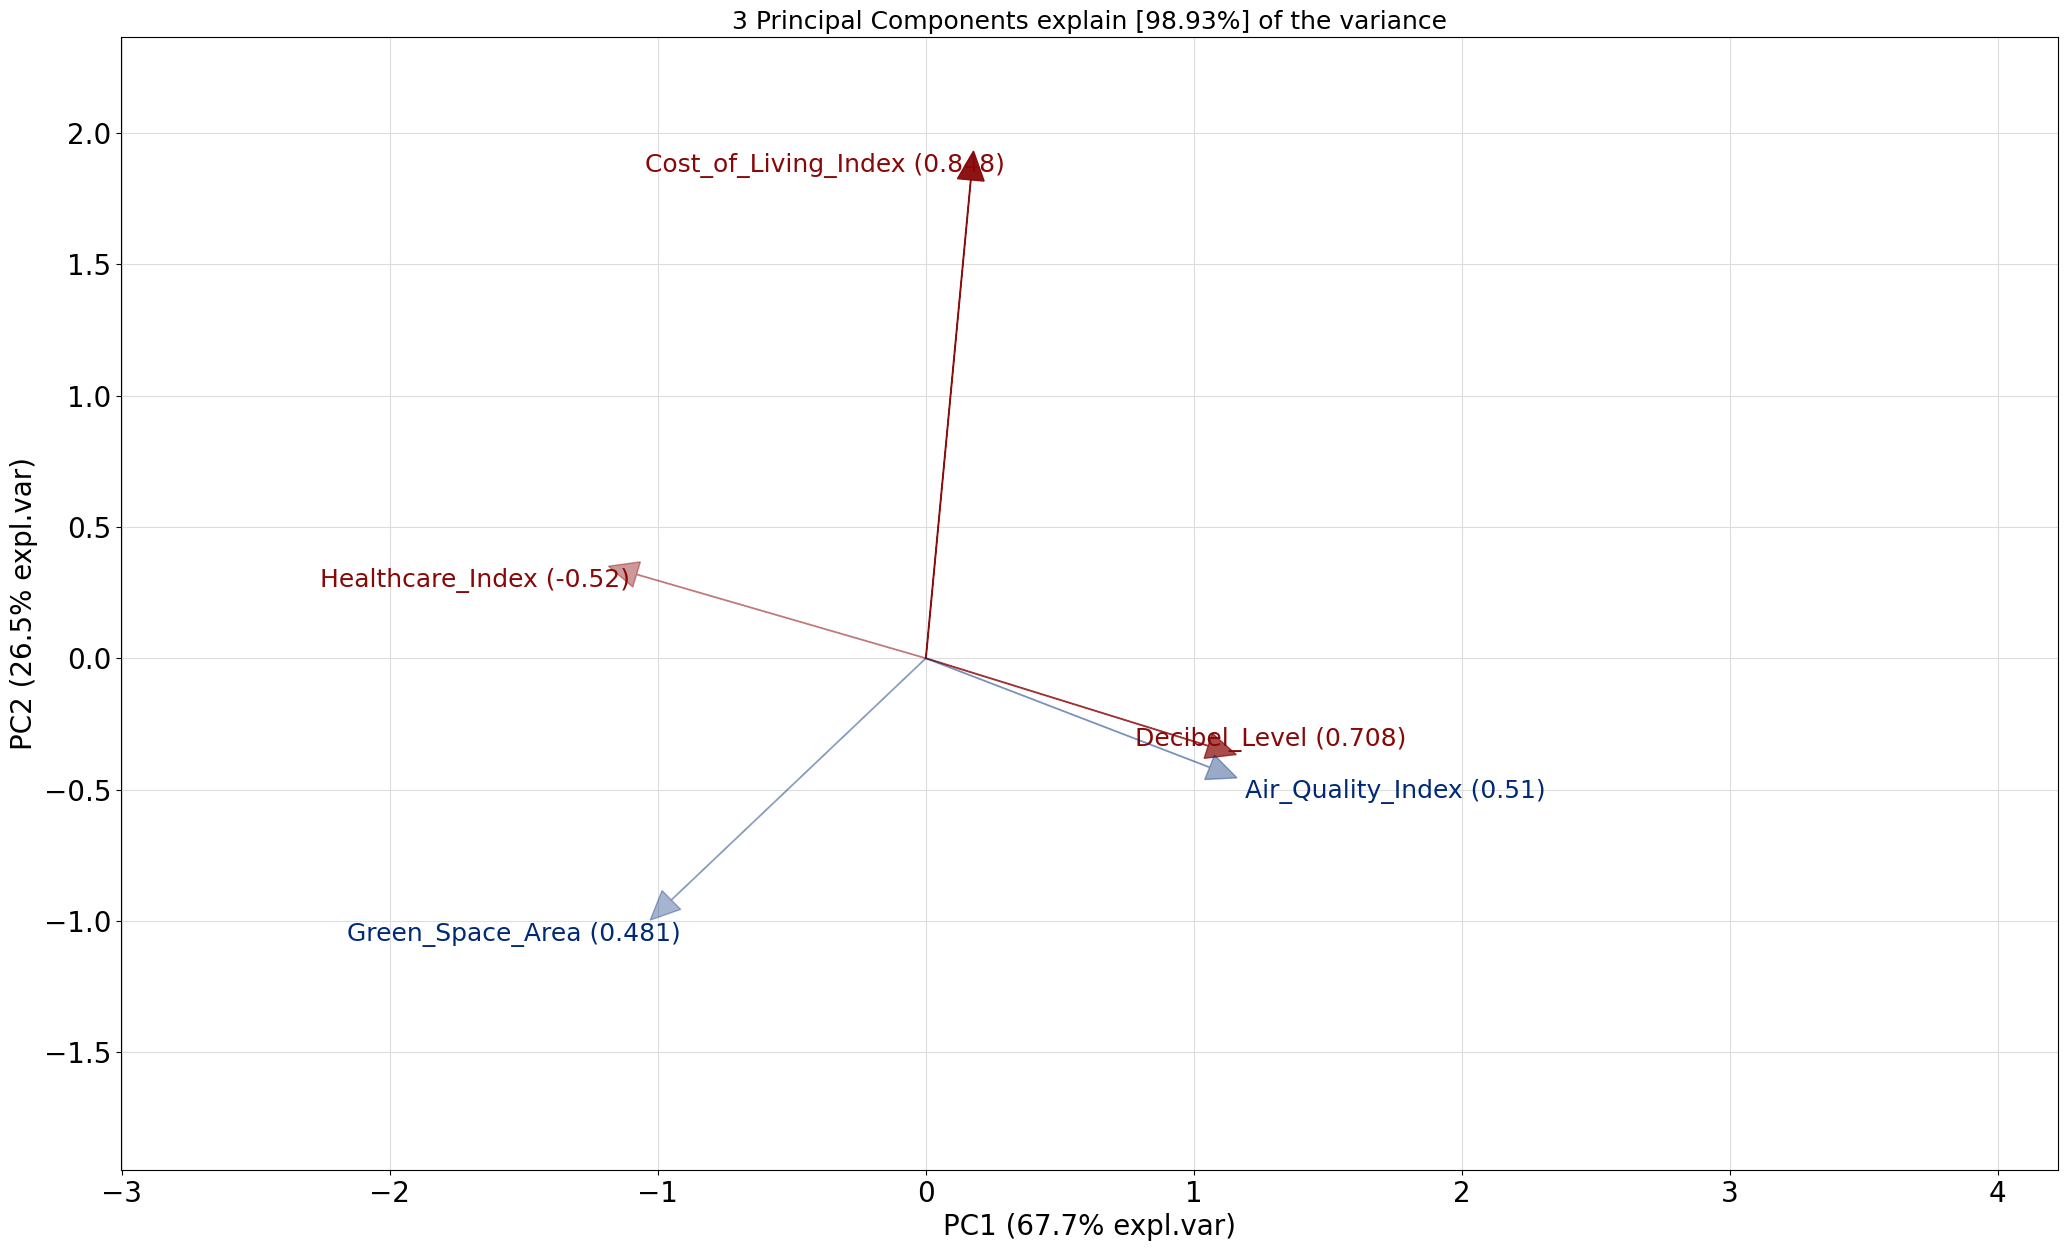

In [11]:
# выключаем цвет точек

pc.biplot(cmap = None);

А если точки важны, можем, наоборот, еще совместную плотность на график добавить:

[scatterd] >INFO> Add density layer


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


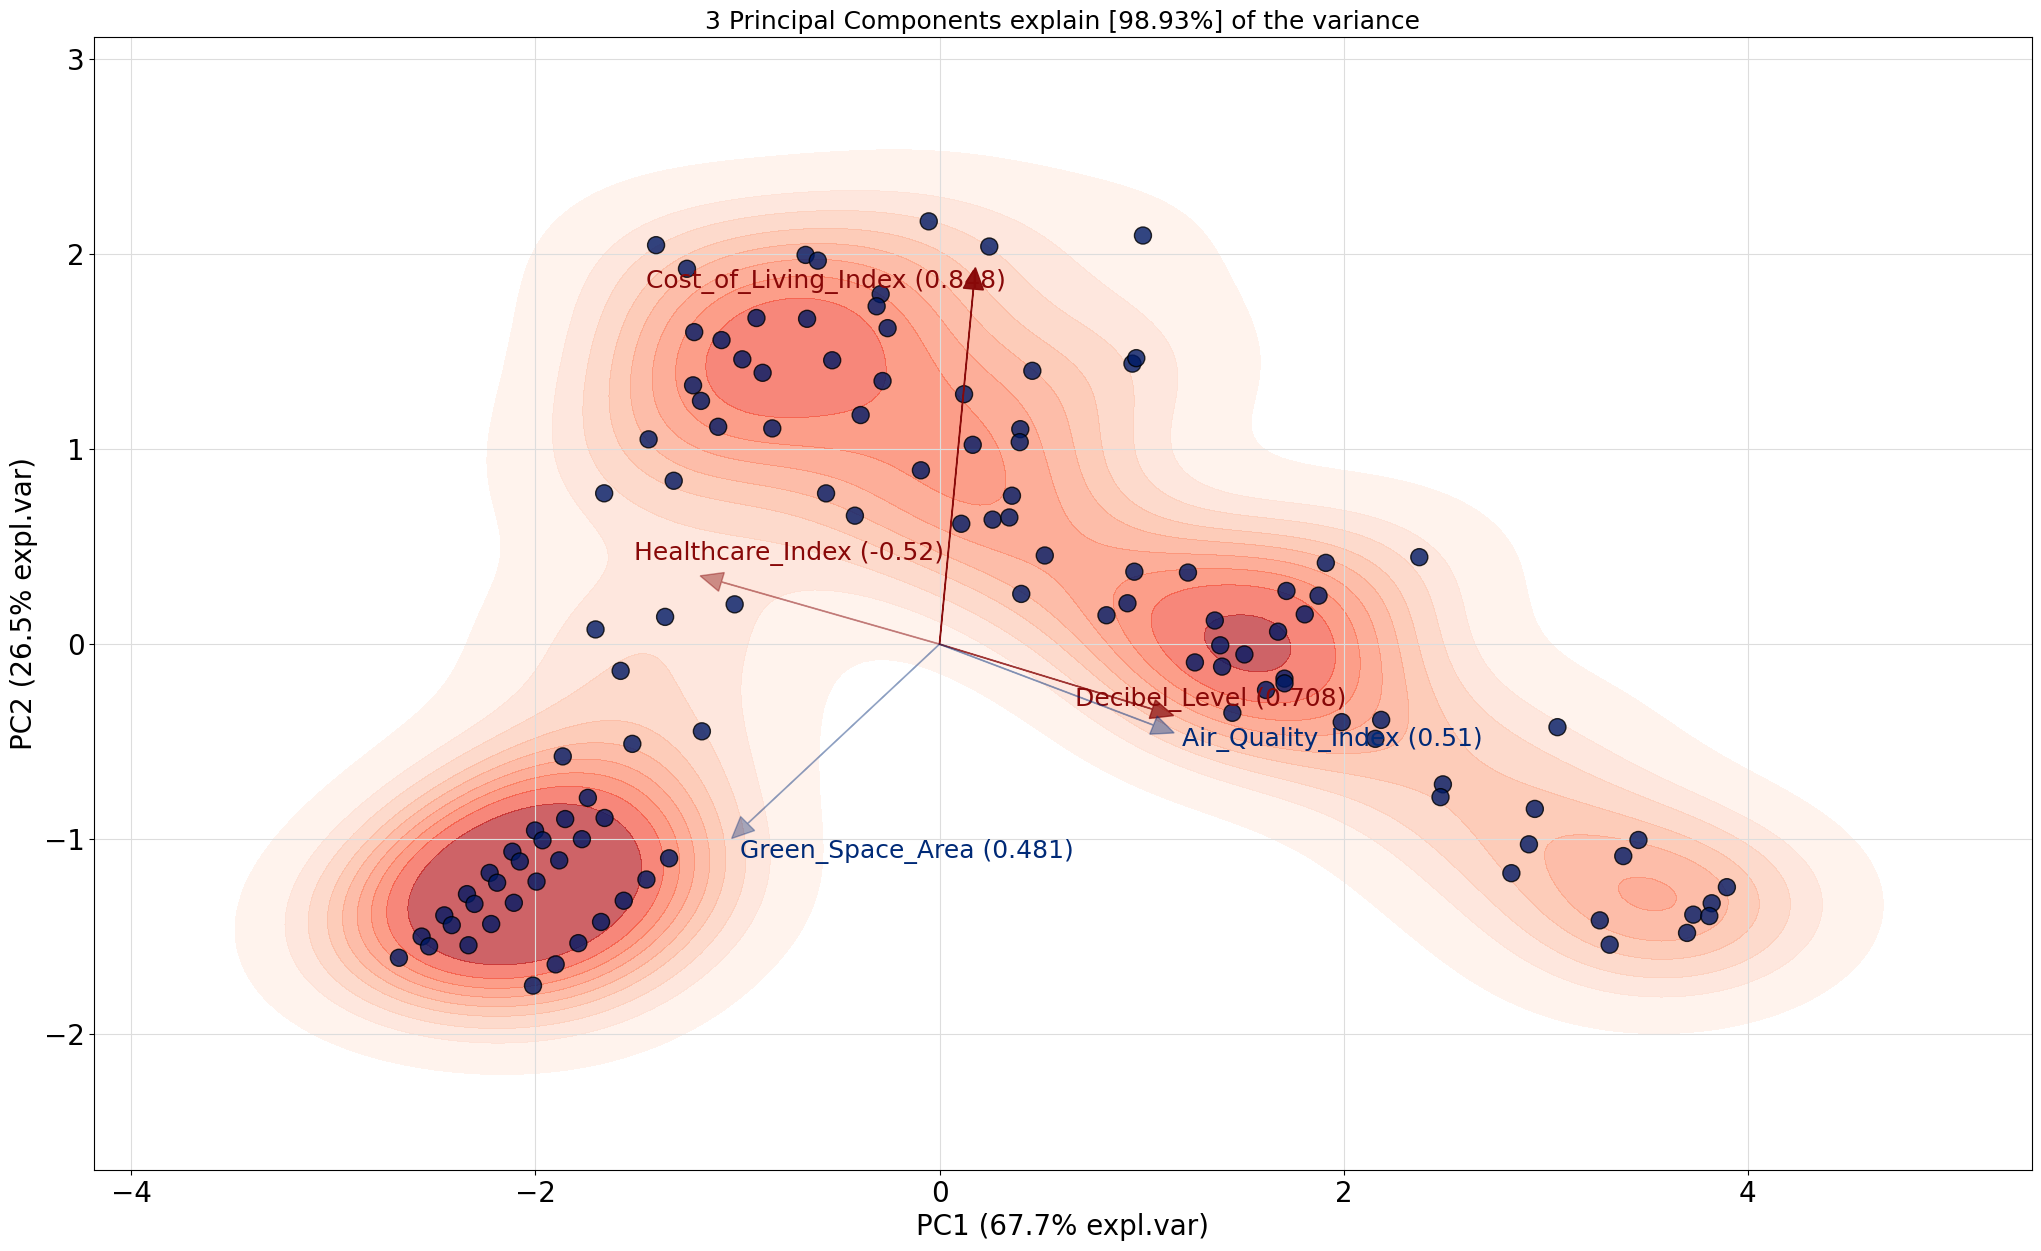

In [12]:
pc.biplot(density = True);

Так как график совместной плотности `PC1` и `PC2` на плоскости просто так не отображается (это функция от двух переменных), здесь она представлена линиями уровня и цветом (как на физической географической карте). Где цвет более темный – там больше всего точек, значения совместной плотности `PC1` и `PC2` высокие, где цвет более светлый – там точек мало, значения совместной плотности `PC1` и `PC2` низкие. По сути, если не обращать внимание на вектора, которые мы уже обсудили, это – доработанная диаграмма рассеивания, по которой можно проследить наличие групп в совместном распределении показателей. 

Пояснения для понимания:

   * Вспомните, что плотность нормального распределения в одномерном случае – это колокообразная функция на плоскости. В двумерном случае совместная плотность двух нормальных случайных величин – это колокообразных «холм» определенной высоты (советую эту интерактивную [симуляцию](https://socr.umich.edu/HTML5/BivariateNormal/)). Если у двух независимых нормальных случайных величин одинаковые средние и дисперсии, это «холм» с круглым основанием, если у первой величины дисперсия больше, основание «холма» вытянуто вдоль первой оси сильнее, основание у «холма» овальное. Если величины не независимые, то основание «холма» еще имеет наклон. На графике выше связь между `PC1` и `PC2` (теоретически они нескоррелированы, но на конкретной выборке коэффициент Пирсона не 0) на участке в окрестности $PC1 = -2$ положительная, основание «холма» имеет положительный наклон, в окрестности $PC1 = 4$ – отрицательная, основание «холма» имеет отрицательный наклон.

* Отсюда самые темные области на графике – это пики «холмов», то есть пики совместных плотностей. Каждый пик – это своего рода центр тяжести каждой группы точек, центр тяжести каждого кластера. Здесь есть явная группа наблюдений, сконцентрированная вокруг пика в точке в окрестности (-2; -1), и расплывчатая группа наблюдений с тремя пиками внутри. Между этой маленькой группой и расплывчатой большой есть большой зазор - относительно большое расстояние между «подножиями холмов», группы разные. Большую расплывчатую группу, в целом, тоже можно поделить на подгруппы, как раз по трем пикам. 


* В целом, если совместное распределение можно считать нормальным, для разделения данных на группы, помимо кластерного анализа, где распределение не так важно, можно использовать расщепление смесей (*mixture models*), в нем как раз реализуется идея проведения границ на основе значений функций совместной плотности.

Вернемся с исходному вопросу – как получить интегральный индекс качества жизни в городе? Мы уже выяснили, что для этого нужно взять значения первой главной компоненты со знаком минус. 

**NB.** Если веса выше были со знаками, противоположными тем, что в выдачах в текущем файле, уберите в коде ниже минус:

In [13]:
# извлекаем из res запись с ключом PC (это датафрейм со всеми PC)
# из него  – столбец PC1
# берем со знаком минус и добавляем столбец в исходные данные

df["Index"] = -res["PC"]["PC1"]

Посмотрим на топ-5 городов с высокими значениями индекса качества жизни:

In [14]:
# сортировка по убыванию по Index
# первые пять строк

df.sort_values("Index", ascending = False).head(5)

,Unnamed: 0,City,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index,Index
113,113,Whangarei,50,Low,280,25,4.8,20,97,2.675800
109,109,Mangawhai,50,Low,260,25,5.8,20,97,2.563508
114,114,Dargaville,55,Low,285,20,4.5,25,98,2.526562
105,105,Warkworth,50,Low,240,25,6.8,20,97,2.451216
110,110,Te Hana,55,Low,265,20,5.5,25,98,2.414269


И на топ-5 городов с низкими значениями индекса качества жизни:

In [15]:
# сортировка по убыванию по Index
# последние пять строк

df.sort_values("Index", ascending = False).tail(5)

,Unnamed: 0,City,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index,Index
65,65,Phnom Penh,80,Very High,10,225,2.5,30,35,-3.700233
64,64,Hanoi,85,Very High,15,220,3.0,35,40,-3.731067
69,69,Jakarta,85,Very High,10,245,3.0,35,45,-3.810401
59,59,Dhaka,90,Very High,5,195,2.5,35,40,-3.822226
68,68,Ho Chi Minh City,90,Very High,5,240,2.8,40,50,-3.897381


Перечни получились вполне логичными (тихие зеленые города Новой Зеландии в топе, шумные загруженные города в Азии внизу), индекс выглядит разумно. Для дальнейшей проверки его валидности можно найти данные по схожим индексам качества жизни и проверить, есть ли между ними связь. По-хорошему, если мы берем близкие по логике индексы, коэффициент корреляции между нашим индексом и другими должен быть положительным и высоким. 

Других данных у нас нет, просто посмотрим на корреляции между нашим индексом качества жизни в городе и индексом счастья:

In [16]:
df[["Index", "Happiness_Score"]].corr()

,Index,Happiness_Score
Index,1.00000,0.78901
Happiness_Score,0.78901,1.00000


Коэффициент Пирсона высокий, положительный, в городах с более благополучными условиями индекс счастья выше, значит, наш индекс качества жизни положительные аспекты жизни в городе все-таки отражает.